In [1]:
!pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron

In [6]:
df=pd.read_csv("/home/suhedata/Downloads/HR-Employee-Attrition.csv")

In [7]:
df.shape

(1470, 35)

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
df.isnull().count()


Age                         1470
Attrition                   1470
BusinessTravel              1470
DailyRate                   1470
Department                  1470
DistanceFromHome            1470
Education                   1470
EducationField              1470
EmployeeCount               1470
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1470
HourlyRate                  1470
JobInvolvement              1470
JobLevel                    1470
JobRole                     1470
JobSatisfaction             1470
MaritalStatus               1470
MonthlyIncome               1470
MonthlyRate                 1470
NumCompaniesWorked          1470
Over18                      1470
OverTime                    1470
PercentSalaryHike           1470
PerformanceRating           1470
RelationshipSatisfaction    1470
StandardHours               1470
StockOptionLevel            1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBa

In [11]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [12]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [13]:
df.drop(['EmployeeCount','EmployeeNumber', 'Over18','StandardHours'], axis = 1, inplace = True)

In [14]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [15]:
# Kategorik değişkenleri seçimi
categorical_variables = df.select_dtypes(include='object')

In [16]:
categorical_variables


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


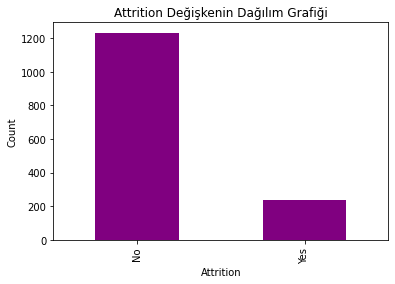

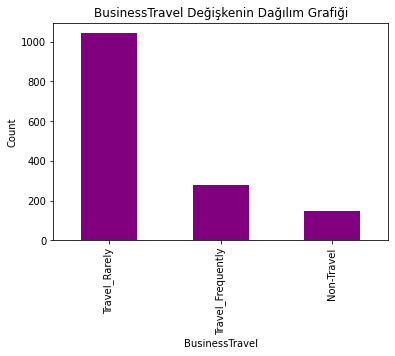

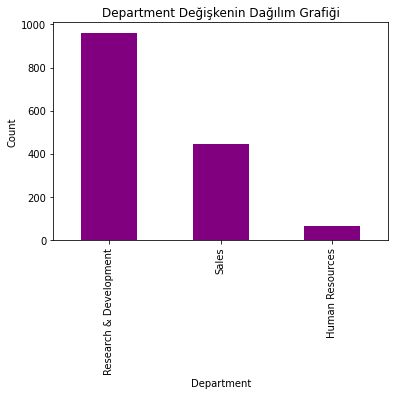

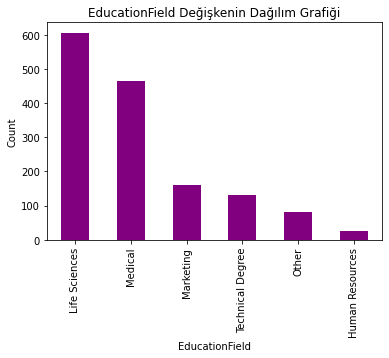

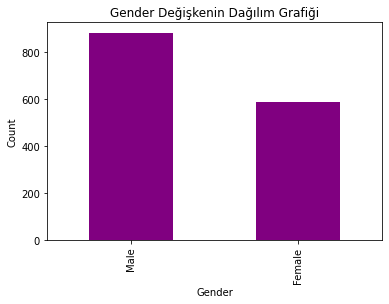

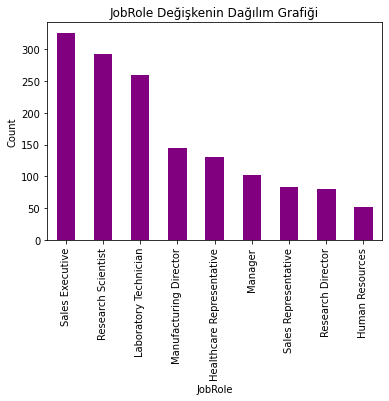

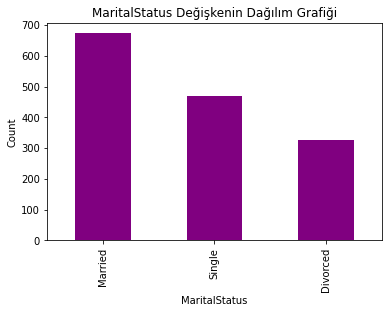

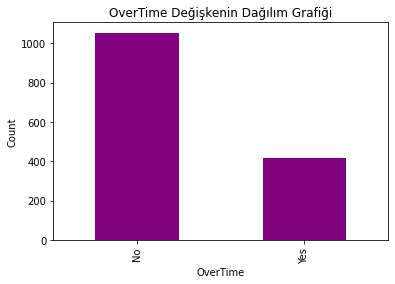

In [17]:
# Her bir kategorik sütun için bar grafiği çizme
for column in categorical_variables:
    category_counts = df[column].value_counts()
    category_counts.plot(kind='bar', color='purple')

    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'{column} Değişkenin Dağılım Grafiği')
    plt.show()

In [18]:
# Ki-kare testi
#HO:Cinsiyet ile yıpranma arasında ilişki yoktur.
#H1:Cinsiyet ile yıpranma arasında ilişki vardır.
def ki_kare_testi(column1,column2):
    observed = pd.crosstab(df[column1], df[column2])
    chi2, p, _, _ = stats.chi2_contingency(observed)
    print("Chi-square test:")
    print(f"Chi-square statistic: {chi2}")
    print(f"p-value: {p}")

    if p < 0.05:
        print("Ho yokluk hipotezi reddedilir.İki değişken arasında ilişki vardır.")
    else:
        print("Ho yokluk hipotezi reddedilemez.İki değişken arasında ilişki yoktur.")



def chi_squart():
    if x==1 :
        print("istatistiksel olarak anlamlidir.")
    else:
        print("istatistiksel olarak anlamli değildir.")

In [19]:
ki_kare_testi('Gender','Attrition')

Chi-square test:
Chi-square statistic: 1.1169671241970975
p-value: 0.29057244902890855
Ho yokluk hipotezi reddedilemez.İki değişken arasında ilişki yoktur.


In [20]:
Education = {1: 'İlkokul', 2: 'Ortaokul', 3: 'Lise', 4: 'Yüksekokul'}

df['Education'] = df['Education'].map(Education)


In [21]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,Ortaokul,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,İlkokul,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Ortaokul,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Yüksekokul,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,İlkokul,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [22]:
#RXC tablo çözümlemesi
ki_kare_testi('Attrition','Department')

Chi-square test:
Chi-square statistic: 10.79600732241067
p-value: 0.004525606574479633
Ho yokluk hipotezi reddedilir.İki değişken arasında ilişki vardır.


In [23]:
#Odds Oranı
# İstenen olayın meydana geldiği durumları ve gelmediği durumları sayma

a = df[df['Attrition'] == 'Yes'].shape[0]
b = df[df['Attrition'] == 'No'].shape[0]

# İstenmeyen olayın meydana geldiği durumları ve gelmediği durumları sayma
c = df[df['OverTime'] == 'Yes'].shape[0]
d = df[df['OverTime'] == 'No'].shape[0]

# Odds oranını hesaplama
odds_ratio = (a * d) / (b * c)
print("Odds Ratio:", odds_ratio)
#İşyerinde insanların yipranmasının mesai kalmalarının ,yıpranmamasına göre %48 kat arttırmaktadır.

Odds Ratio: 0.4870040239565787


In [24]:
#Odds oranı önem kontrolü
z=1.96 #alfa değeri 0.05 olarak alındı.
x= 1/a + 1/b + 1/c + 1/d
ln_odds = math.log(odds_ratio)
standarthata= math.sqrt(x)
#güven aralığı hesaplamak için

üst_sinir= ln_odds + z * standarthata
alt_sinir= ln_odds - z * standarthata

print("Güven Aralığı:",(alt_sinir,üst_sinir)) # 0 kapsamadığı için odds oranı istatistiksel olarak anlamlıdır.

Güven Aralığı: (-0.8989385499622976, -0.5400272364160398)


In [25]:

# Frekans tablosunu oluşturma
frekans_tablosu = pd.crosstab(index=df['Attrition'], columns=[df['Department'], df['Gender']])

print(frekans_tablosu)

Department Human Resources      Research & Development       Sales     
Gender              Female Male                 Female Male Female Male
Attrition                                                              
No                      14   37                    336  492    151  203
Yes                      6    6                     43   90     38   54


In [26]:
#Satır etki Modeli N x O
frekans_tablosu = pd.crosstab(index=df['Department'], columns=df['Education'])

print(frekans_tablosu)  

Education               Lise  Ortaokul  Yüksekokul  İlkokul
Department                                                 
Human Resources           27        13          15        5
Research & Development   379       182         255      115
Sales                    166        87         128       50


In [27]:
"""bins = [20, 30, 40, float('inf')]
labels = ['20-30', '31-40', '41+']

# Yaş değerlerini aralıklara bölme
df['Yas_Araligi'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)"""

"bins = [20, 30, 40, float('inf')]\nlabels = ['20-30', '31-40', '41+']\n\n# Yaş değerlerini aralıklara bölme\ndf['Yas_Araligi'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)"

In [28]:
"""#Sütun etki Modeli 0 x N
frekans_tablosu = pd.crosstab(index=df['Yas_Araligi'], columns=df['Department'])

print(frekans_tablosu)"""

"#Sütun etki Modeli 0 x N\nfrekans_tablosu = pd.crosstab(index=df['Yas_Araligi'], columns=df['Department'])\n\nprint(frekans_tablosu)"

In [29]:
df.corr()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079
MonthlyRate,0.028051,-0.032182,0.027473,0.037600,-0.015297,-0.016322,0.039563,0.000644,0.034814,1.000000,...,-0.009811,-0.004085,-0.034323,0.026442,0.001467,0.007963,-0.023655,-0.012815,0.001567,-0.036746


(<AxesSubplot:>,)

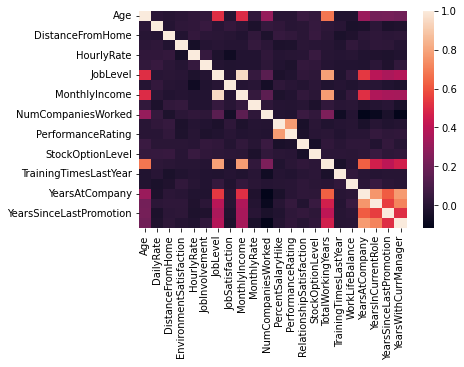

In [30]:
sns.heatmap(df.corr()),

In [31]:
#MODEL

# Model Building

# Encoding the categorical variables

le = LabelEncoder()

for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

In [32]:
# Splitting the dataset into train and test

X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

prediction = lr.predict(X_test_std)
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       255
           1       0.75      0.38      0.51        39

    accuracy                           0.90       294
   macro avg       0.83      0.68      0.73       294
weighted avg       0.89      0.90      0.89       294



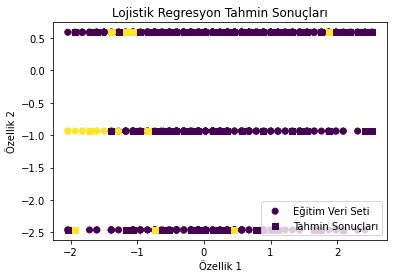

In [35]:
# Eğitim veri setini çizdirin
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train, cmap='viridis', label='Eğitim Veri Seti')
# Test veri setini çizdirin
plt.scatter(X_test_std[:, 0], X_test_std[:, 1], c=prediction, cmap='viridis', marker='s', label='Tahmin Sonuçları')

plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.title('Lojistik Regresyon Tahmin Sonuçları')
plt.legend()
plt.show()

/home/suhedata/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


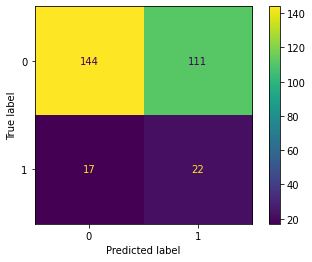

In [36]:
y_pred = lr.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


0.7708396178984415


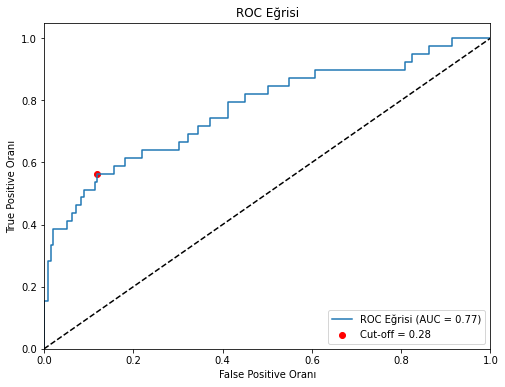

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Lojistik regresyon modelinden tahmin olasılıklarını alın
y_pred_prob = lr.predict_proba(X_test_std)[:, 1]


# ROC eğrisi için false positive oranı, true positive oranı ve eşik değerlerini hesaplayın
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = auc(fpr, tpr)
print(roc_auc)
# Cut-off değeri 

cutoff_index = np.argmax(tpr - fpr)

# ROC eğrisi
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Eğrisi (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(fpr[cutoff_index], tpr[cutoff_index], color='red', label='Cut-off = %0.2f' % thresholds[cutoff_index])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()


In [38]:
# Table of hypertuned models

models = [DecisionTreeClassifier(criterion='entropy', max_depth=3), RandomForestClassifier(max_features='auto', n_estimators=100), GradientBoostingClassifier(learning_rate=0.1, n_estimators=100), AdaBoostClassifier(learning_rate=0.1, n_estimators=100), KNeighborsClassifier(n_neighbors=1), SVC(C=0.001, kernel='linear'), GaussianNB(), SGDClassifier(alpha=0.0001, penalty='l2'), Perceptron(alpha=0.0001, penalty='l2')]

model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Ada Boost', 'KNN', 'SVC', 'Naive Bayes', 'SGD Classifier', 'Perceptron']

accuracy = []
roc_auc = []
pred_probs = []

for i in models:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_pred))
    
    if hasattr(i, 'predict_proba'):
        pred_prob = i.predict_proba(X_test)
        pred_probs.append(pred_prob)
    else:
        pred_probs.append(None)

model_comparison = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy, 'ROC AUC': roc_auc})
model_comparison.sort_values(by='Accuracy', ascending=False)



/home/suhedata/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


,Model,Accuracy,ROC AUC
2,Gradient Boosting,0.877551,0.636199
1,Random Forest,0.874150,0.547360
3,Ada Boost,0.874150,0.525641
5,SVC,0.867347,0.500000
7,SGD Classifier,0.867347,0.500000
8,Perceptron,0.867347,0.500000
0,Decision Tree,0.857143,0.515837
6,Naive Bayes,0.843537,0.714329
4,KNN,0.782313,0.537858


En iyi model: Gradient Boosting


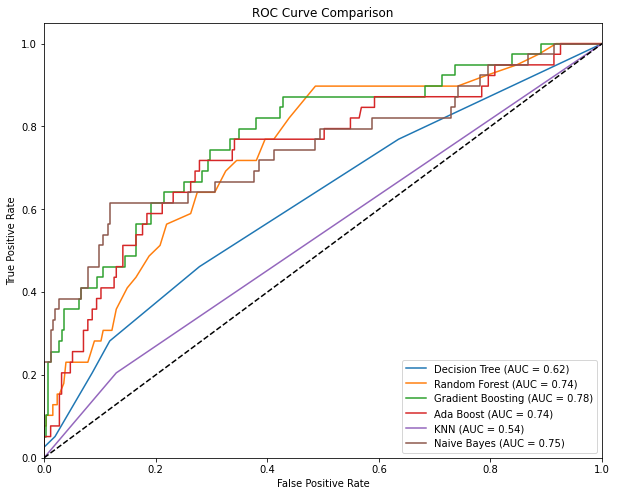

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

best_model = ''
best_auc = 0.0

for i in range(len(models)):
    if pred_probs[i] is not None:
        fpr, tpr, thresholds = roc_curve(y_test, pred_probs[i][:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')
        if roc_auc > best_auc:
            best_model = model_names[i]
            best_auc = roc_auc

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')

print(f"En iyi model: {best_model}")

plt.show()
